In [70]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
ds = pd.read_csv('/Users/adityakumar/Desktop/Machine Learning/train.csv').values
ds.shape

(42000, 785)

In [72]:
xtrain=ds[:10000, 1:]/255.05
ytrain=ds[:10000, 0]

xtest=ds[23000:24500, 1:]/255.0
ytest=ds[23000:24500, 0]

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(10000, 784) (10000,)
(1500, 784) (1500,)


In [87]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder=nn.Sequential(
                nn.Linear(28*28, 128),
                nn.Tanh(),
                nn.Linear(128, 64),
                nn.Tanh(),
                nn.Linear(64, 12),
                nn.Tanh(),
                nn.Linear(12, 3))
        
        
        self.decoder=nn.Sequential(
                nn.Linear(3, 12),
                nn.Tanh(),
                nn.Linear(12, 64),
                nn.Tanh(),
                nn.Linear(64, 128),
                nn.Tanh(),
                nn.Linear(128, 28*28),
                nn.Sigmoid())

        
    def forward(self, x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return encoded, decoded

In [88]:
model = AutoEncoder()

In [91]:
optimizer  = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()

In [104]:
def batch(train, labels, batch=32):
    start=0
    stop=start+batch
    while start<train.shape[0]:
        yield Variable(torch.FloatTensor(train[start:stop])), Variable(torch.FloatTensor(train[start:stop]))
        start=stop
        stop=start+batch

In [106]:
for epoch in range(200):
    for step, (b_x, b_y) in enumerate(batch(xtrain, ytrain)):

        output=model(b_x)
        #print(b_y.shape)
        loss=loss_func(output[1], b_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 350 == 0 and epoch % 10 ==0:
            test_output = model(torch.FloatTensor(xtest))
            test_loss = loss_func(test_output[1], torch.FloatTensor(xtest))
            loss = test_loss.data.numpy()
            print('Epoch: ', epoch, '| Step: ', step, '| Loss: ', loss)

Epoch:  0 | Step:  0 | Loss:  0.07215369
Epoch:  10 | Step:  0 | Loss:  0.04921706
Epoch:  20 | Step:  0 | Loss:  0.044034995
Epoch:  30 | Step:  0 | Loss:  0.041676454
Epoch:  40 | Step:  0 | Loss:  0.04062917
Epoch:  50 | Step:  0 | Loss:  0.040559668
Epoch:  60 | Step:  0 | Loss:  0.040145524
Epoch:  70 | Step:  0 | Loss:  0.038862005
Epoch:  80 | Step:  0 | Loss:  0.03931379
Epoch:  90 | Step:  0 | Loss:  0.038789038


KeyboardInterrupt: 

In [96]:
torch.max?

In [197]:
o = model(torch.FloatTensor(xtrain[:100]))[1].data.numpy()

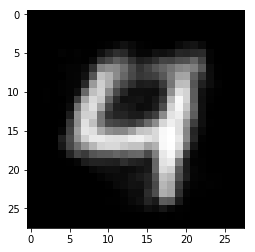

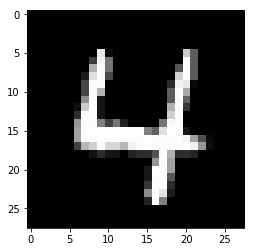

In [198]:
plt.figure(0)
plt.imshow(o[42].reshape((28, 28)), cmap='gray')

plt.figure(1)
plt.imshow(xtrain[42].reshape((28, 28)), cmap='gray')

In [199]:
print(np.mean(o[42]))
print(max(o[42]))
print(min(o[42]))

0.14855978
0.9718551
2.045767e-07


In [200]:
print(len(o[42]))
print(o[42])

784
[1.03363582e-05 9.74896557e-06 8.19657271e-06 1.03314987e-05
 9.59638692e-06 9.82348683e-06 9.46057480e-06 7.41550775e-06
 7.11738221e-06 8.40369648e-06 1.05591862e-05 1.11358722e-05
 9.78933349e-06 1.17991503e-05 8.42688951e-06 9.66006428e-06
 1.08176318e-05 1.04298415e-05 7.38594281e-06 1.12310263e-05
 1.02966005e-05 9.09139271e-06 8.39318818e-06 7.00549481e-06
 9.11623192e-06 8.07773631e-06 9.00752548e-06 1.09838338e-05
 7.03059959e-06 1.20409786e-05 9.18210662e-06 8.52727135e-06
 1.13541300e-05 9.83620885e-06 4.59685180e-05 4.31558467e-04
 4.18160053e-05 7.96395568e-07 9.37959703e-05 2.98284363e-06
 1.16308111e-05 1.54784702e-05 8.98248327e-05 1.42383067e-06
 2.37128370e-05 3.53879841e-07 2.73201954e-06 9.04243461e-06
 4.47940874e-05 3.34365609e-06 1.09121174e-05 1.00790148e-05
 1.16706660e-05 9.77690615e-06 9.45586635e-06 7.71345094e-06
 8.33985723e-06 7.77962850e-06 7.67265919e-06 8.50667311e-06
 7.98976725e-06 1.65472266e-05 1.54370297e-04 8.79962317e-06
 2.97381356e-03 7.50

In [157]:
b=o[42]

In [210]:
for i in range(784):
    if b[i]> 9.59638692e-06:

        b[i]=0
    else:
        b[i]=0.97

In [211]:
print(b)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0. 

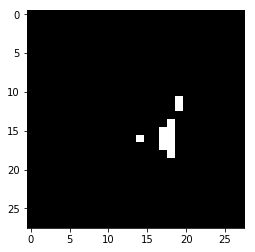

In [209]:
plt.figure(1)
plt.imshow(b.reshape((28, 28)), cmap='gray')